# Introdução

Está análise tem como objetivo analise de mortalidade de alguns paises entre , para comparações a nível mundial. Será comparado os países dos BRICS inicialmente, e conforme o país analise, nos aprofundaremos em alguns detalhes.

Para está analise foi utilizada o dataset do Kaggle, disponível em: https://www.kaggle.com/datasets/madhurpant/world-deaths-and-causes-1990-2019

Utilizaremos:
-Dataset referente a mortalidade mundial entre 1990 e  2019


#Importando bibliotecas e carregando dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('annual_deaths_by_causes.csv')
data

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


# Verificando a estrutura dos dados

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

Podemos verificar que, tirando a cause de morte "terrorismo", todas colunas sobre algum tipo de mortalidade apresentam valores iguais, portanto, não iremos incluir a causa de morte de "terrorismo" na análise.

Além disso, cada pais possui uma correspondência ao ano, portanto, essas duas colunas não precisam ser modificadas.

Porém, a coluna código apresenta um número esquisito, vamos tentar verificar o porquê mais pra frente.

Antes, disso porém, vamos verificar se não há nulls nas colunas, mesmo que apresentem valores iguais.

In [3]:
data.isnull().sum()

country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environmental_heat_and_cold_exposure     433
neoplasms 

Estranhamente, os números de nulls são iguais dentre as colunas também, o que sugere que em alguns países em anos específicos(ou talvez durante todo o período), não houve os dados para os mesmos.

De qualquer forma, não iremos incluir esses países na análise para evitar confusões.

Porém, cabe a análise, verificar a estrutura desses nulls no dataset.

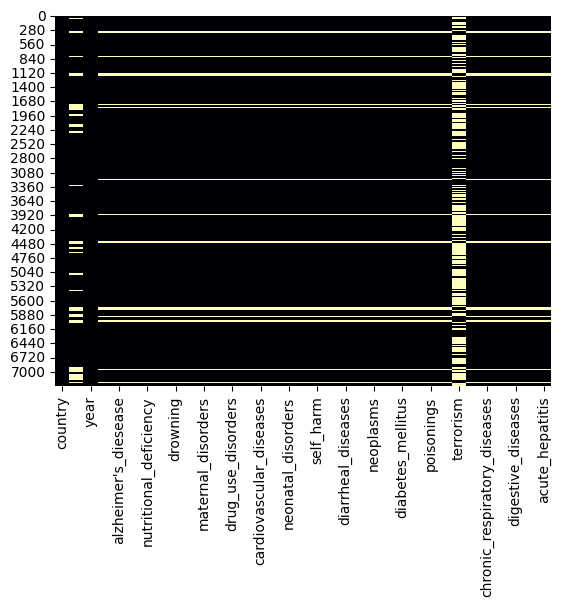

In [4]:
_= sns.heatmap(data.isnull(),cmap = "magma",cbar = False)

Com esse gráfico confirmamos que alguns países não possuem dados para a linha toda quando NULL está presente.

In [5]:
data[pd.isnull(data.code)].country.unique()

array(['African Region (WHO)', 'Australasia & Oceania',
       'Bosnia-Herzegovina', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'East Asia & Pacific (WB)',
       'East Germany (GDR)', 'East Timor', 'Eastern Europe',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'International', 'Latin America & Caribbean (WB)', 'Macau',
       'Middle East & North Africa', 'Middle East & North Africa (WB)',
       'North America', 'North America (WB)', 'Northern Ireland',
       'OECD Countries', 'Region of the Americas (WHO)', 'Scotland',
       'Serbia-Montenegro', 'South America', 'South Asia',
       'South Asia (WB)', 'South-East Asia Region (WHO)',
       'Southeast Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (WB)',
       'Wales', 'West Germany (FRG)', 'Western Europe',
       'Western Pacific Region (WHO)', 'World (excluding China)',
       'World Bank High Income', 'World Bank Lo

Descobrimos o porquê de alguns países não terem código, mas essa informação não traz nenhuma relevância para a análise então vamos continuar.

In [6]:
na_drowning = data[pd.isnull(data.drowning)].country.unique()
print(na_drowning)

['Australasia & Oceania' 'Bosnia-Herzegovina'
 'Central America & Caribbean' 'Central Asia' 'Czechoslovakia' 'East Asia'
 'East Germany (GDR)' 'East Timor' 'Eastern Europe' 'French Guiana'
 'French Polynesia' 'Guadeloupe' 'Hong Kong' 'International' 'Kosovo'
 'Macau' 'Martinique' 'Middle East & North Africa' 'New Caledonia'
 'North America' 'Serbia-Montenegro' 'South America' 'South Asia'
 'Southeast Asia' 'Sub-Saharan Africa' 'USSR' 'Wallis and Futuna'
 'West Germany (FRG)' 'Western Europe' 'Western Sahara'
 'World (excluding China)' 'Yugoslavia' 'Zaire']


Verificamos 2 pontos de atenção: Já que estamos analisando os BRICS, que incluem Russia e China, devemos analisar USSR(que a Russia fez parte) e  Hong Kong(que não é tecnicamente da China,mas já foi território), para ver se não há dados nesses países que deviam estar incluidos.

In [7]:
data.loc[data.country == "Hong Kong"].sort_values(by = "year")

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
2749,Hong Kong,HKG,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2750,Hong Kong,HKG,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2751,Hong Kong,HKG,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2752,Hong Kong,HKG,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2753,Hong Kong,HKG,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2754,Hong Kong,HKG,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2755,Hong Kong,HKG,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2756,Hong Kong,HKG,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2757,Hong Kong,HKG,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2758,Hong Kong,HKG,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.loc[data.country == "China"].sort_values(by = "year")

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
1252,China,CHN,1990,37473.0,93316.0,31920.0,42176.0,1535.0,153773.0,40143.0,...,98607.0,22496.0,40015.0,2.0,230499.0,1301224.0,167671.0,322746.0,17289.0,26162.0
1253,China,CHN,1991,36834.0,95470.0,32607.0,42446.0,2245.0,150399.0,39187.0,...,98875.0,21944.0,40380.0,0.0,226876.0,1324798.0,169742.0,325511.0,17205.0,25305.0
1254,China,CHN,1992,35086.0,98135.0,33287.0,37980.0,2061.0,144949.0,38179.0,...,99808.0,21357.0,36013.0,9.0,226374.0,1347922.0,169544.0,323758.0,16846.0,23933.0
1255,China,CHN,1993,33396.0,100822.0,34129.0,35265.0,1327.0,142119.0,37525.0,...,100190.0,20976.0,33447.0,NaN,227370.0,1364268.0,169199.0,320315.0,16377.0,22477.0
1256,China,CHN,1994,31752.0,103621.0,34680.0,32825.0,1146.0,138993.0,38146.0,...,101945.0,20528.0,31078.0,18.0,233459.0,1366039.0,167640.0,315647.0,16504.0,20915.0
1257,China,CHN,1995,29319.0,106958.0,35450.0,29567.0,1068.0,136083.0,37763.0,...,103512.0,20746.0,27874.0,6.0,240786.0,1360352.0,166990.0,311593.0,15467.0,19407.0
1258,China,CHN,1996,26788.0,111481.0,36703.0,27043.0,930.0,130813.0,36192.0,...,105289.0,20913.0,25379.0,23.0,244790.0,1357793.0,165875.0,306420.0,14665.0,17930.0
1259,China,CHN,1997,23987.0,116489.0,37807.0,24625.0,946.0,124856.0,34972.0,...,107266.0,20818.0,23004.0,37.0,248806.0,1342027.0,164192.0,300603.0,14047.0,16588.0
1260,China,CHN,1998,21485.0,121766.0,38955.0,22088.0,558.0,121543.0,34164.0,...,110205.0,21270.0,20420.0,50.0,255467.0,1329613.0,163959.0,297422.0,13430.0,15359.0
1261,China,CHN,1999,19295.0,127660.0,40894.0,19966.0,1142.0,115349.0,33074.0,...,114372.0,21346.0,18279.0,5.0,264540.0,1335801.0,165625.0,298457.0,12925.0,14446.0


In [9]:
data.loc[data.country == "Russia"].sort_values(by = "year")

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
5120,Russia,RUS,1990,2255.0,23706.0,5882.0,465.0,0.0,13528.0,28335.0,...,9023.0,8691.0,239.0,NaN,39298.0,57982.0,16502.0,43349.0,7205.0,159.0
5121,Russia,RUS,1991,2199.0,24804.0,5987.0,473.0,0.0,14178.0,30982.0,...,9292.0,8977.0,244.0,NaN,39515.0,58080.0,17257.0,44622.0,7592.0,154.0
5122,Russia,RUS,1992,2253.0,25388.0,6228.0,516.0,0.0,15559.0,41586.0,...,10067.0,9922.0,262.0,34.0,41484.0,61139.0,19707.0,49407.0,8701.0,152.0
5123,Russia,RUS,1993,2564.0,26077.0,6912.0,623.0,0.0,19098.0,56102.0,...,11879.0,12105.0,306.0,NaN,47191.0,69997.0,25602.0,60310.0,11030.0,163.0
5124,Russia,RUS,1994,2803.0,26677.0,7286.0,691.0,0.0,21430.0,63629.0,...,12960.0,13449.0,334.0,34.0,49102.0,74217.0,30406.0,67981.0,12594.0,173.0
5125,Russia,RUS,1995,2689.0,26650.0,7038.0,659.0,0.0,20808.0,61876.0,...,12270.0,12798.0,325.0,145.0,44806.0,69003.0,30320.0,66385.0,12156.0,173.0
5126,Russia,RUS,1996,2387.0,26918.0,6846.0,605.0,0.0,18380.0,52944.0,...,11340.0,11871.0,305.0,135.0,39482.0,64423.0,28354.0,62300.0,11353.0,168.0
5127,Russia,RUS,1997,2203.0,26786.0,6729.0,558.0,0.0,16558.0,47709.0,...,10553.0,11073.0,289.0,61.0,35532.0,60386.0,26424.0,58632.0,10557.0,166.0
5128,Russia,RUS,1998,2112.0,26820.0,6718.0,547.0,0.0,16448.0,46589.0,...,10315.0,10958.0,285.0,49.0,35166.0,57608.0,26352.0,58314.0,10648.0,166.0
5129,Russia,RUS,1999,2230.0,27413.0,7157.0,602.0,0.0,18008.0,52417.0,...,11050.0,11876.0,311.0,395.0,38627.0,60175.0,29995.0,64587.0,12229.0,177.0


In [10]:
data.loc[data.country == "USSR"].sort_values(by = "year")

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
6582,USSR,OWID_USS,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN
6583,USSR,OWID_USS,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


Aparentemente tudo ok, Russia e China tem dados para todos os anos, então não parece ser um problema remover USSR e Hong Kong do dataset.

# Limpeza dos dados

Agora vamos apagar, todas as linhas que tem NULL em drowning, pois, como já vimos, quando a NULL nessa coluna, quase todas as outras normalmente também tem NULL.

Selecionando linhas que não possuem os valores que não desejamos

In [11]:
for codeV in na_drowning:
    data = data[data.country != codeV]

Verificando se deu certo:

In [12]:
data[pd.isnull(data.drowning)].country.unique()

array([], dtype=object)

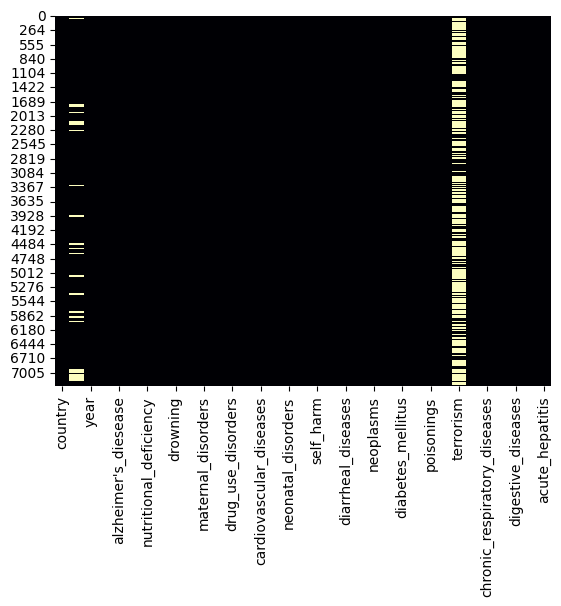

In [13]:
_= sns.heatmap(data.isnull(),cmap = "magma",cbar = False)

# Analise dos dados

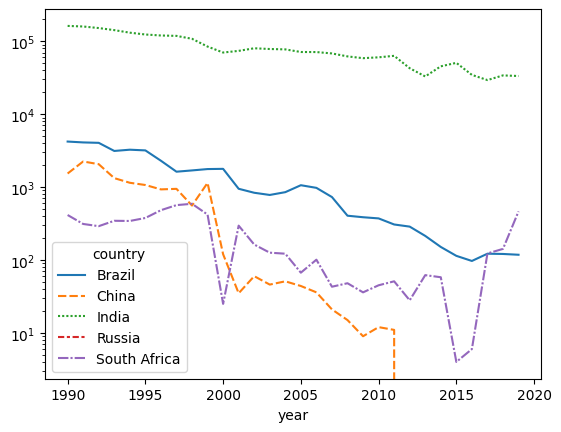

In [73]:
BRICS = data.loc[data.country.isin(["Brazil","India", "China", "Russia","South Africa"])]
BRICS_malaria = BRICS.groupby(["year","country"]).malaria.sum().unstack()
BRICS_malaria
sns.lineplot(data = BRICS_malaria).set_yscale('log')

